# Analysis of Obesity data for different countries 

## Exploring Datasets with pandas and Matplotlib

### Toolkits: The course heavily relies on pandas and Numpy for data wrangling, analysis, and visualization. The primary plotting library that we are exploring in the course is Matplotlib.

### Dataset: List Obesity rate from each country based on population from 1975 to 2017 picked from kaggle.com for learning Data Science

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library


In [2]:
# Read the CSV format excel that was saved in local drives. 

df_obes=pd.read_csv("/resources/data/Obesity-Cleaned.csv")

df_obes.head()


,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


#### 1) Clean up dataset to remove rows/colums which has least significance or not imformative.

In [3]:
# Per each county and each year we have three rows 1) Both genders ,2)Male and 3)Female. 
# Let us concentrate on overall population for country

df_obesity = df_obes[(df_obes['Sex'] == 'Both sexes')]

df_obesity.head()


,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
6,6,Afghanistan,1977,0.6 [0.2-1.2],Both sexes
9,9,Afghanistan,1978,0.6 [0.2-1.3],Both sexes
12,12,Afghanistan,1979,0.6 [0.3-1.3],Both sexes


#### 2) Rename columns for more readability and drop columns which are not required. 
###### Since we are not concentrating on" gender in our initial analysis, we can drop column "SEX"

In [4]:
df_obesity.columns


Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [5]:
# All datatypes are object , covert obesity percentage to float and remove range.
# Since we are not concentrating on" gender in our initial analysis, we can drop column "SEX", drop te 

df_obesity.drop(['Sex'], axis=1 , inplace=True)
df_obesity.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,Country,Year,Obesity (%)
0,0,Afghanistan,1975,0.5 [0.2-1.1]
3,3,Afghanistan,1976,0.5 [0.2-1.1]
6,6,Afghanistan,1977,0.6 [0.2-1.2]
9,9,Afghanistan,1978,0.6 [0.2-1.3]
12,12,Afghanistan,1979,0.6 [0.3-1.3]


In [6]:
#### Check whether there are any null values/ missing values for Obesity percentage before converting datatype from string to float. 
## df_obesity.dropna(subset=["Obesity (%)"], axis=0, inplace= True) 
df_obesity["Obesity (%)"].str[0:4].unique()




array(['0.5 ', '0.6 ', '0.7 ', '0.8 ', '0.9 ', '1.0 ', '1.1 ', '1.2 ',
       '1.3 ', '1.4 ', '1.5 ', '1.6 ', '1.7 ', '1.8 ', '1.9 ', '2.1 ',
       '2.2 ', '2.3 ', '2.4 ', '2.6 ', '2.7 ', '2.9 ', '3.0 ', '3.2 ',
       '3.4 ', '3.6 ', '3.8 ', '4.0 ', '4.2 ', '4.4 ', '4.7 ', '4.9 ',
       '5.2 ', '5.5 ', '6.5 ', '6.7 ', '6.8 ', '7.0 ', '7.2 ', '7.4 ',
       '7.6 ', '7.8 ', '8.0 ', '8.3 ', '8.5 ', '8.7 ', '9.0 ', '9.3 ',
       '9.5 ', '9.8 ', '10.1', '10.4', '10.7', '11.0', '11.3', '11.7',
       '12.0', '12.4', '12.8', '13.2', '13.6', '14.0', '14.5', '14.9',
       '15.4', '16.0', '16.5', '17.0', '17.6', '18.2', '18.8', '19.3',
       '19.9', '20.5', '21.1', '21.7', '6.9 ', '7.7 ', '8.6 ', '9.4 ',
       '9.7 ', '10.2', '10.6', '11.5', '11.9', '13.3', '13.8', '14.3',
       '14.8', '15.3', '15.8', '16.3', '16.8', '17.4', '17.9', '18.5',
       '19.1', '19.6', '20.2', '20.8', '21.4', '22.0', '22.7', '23.3',
       '24.0', '24.7', '25.3', '26.0', '26.7', '27.4', '12.9', '13.5',
      

In [7]:
# there are few conutries with "NO Data" as Obesity percentage, Analyze whether it is for few years or whole country.

df_obesity[(df_obesity['Obesity (%)'] =='No data')].Country.unique()

array(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], dtype=object)

In [9]:
# We have four countries obesity % data is not available for any year, We can drop it.  
df_obesty= df_obesity[(df_obesity['Obesity (%)'] !='No data')]


In [10]:
# Converting data type into float from string to perform calculation. 
df_obesty['Obesity']=df_obesty['Obesity (%)'].str[0:4].astype(float)
df_obesty.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Country,Year,Obesity (%),Obesity
0,0,Afghanistan,1975,0.5 [0.2-1.1],0.5
3,3,Afghanistan,1976,0.5 [0.2-1.1],0.5
6,6,Afghanistan,1977,0.6 [0.2-1.2],0.6
9,9,Afghanistan,1978,0.6 [0.2-1.3],0.6
12,12,Afghanistan,1979,0.6 [0.3-1.3],0.6


In [11]:
# Check the Year range and transpose years into columns 

# df_obesty.Year.unique()
# Range = [1975 to 2016 ]

# Dropping columns that might not be required 
df_obesty.drop(['Obesity (%)','Unnamed: 0'],axis=1,inplace=True)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_obesty.head()

,Country,Year,Obesity
0,Afghanistan,1975,0.5
3,Afghanistan,1976,0.5
6,Afghanistan,1977,0.6
9,Afghanistan,1978,0.6
12,Afghanistan,1979,0.6


### From Formatted dataset , Analyze the Obesity pattern for different countries. 



#### We have 191 countries for analysis and Identify top 15 countries with more Obesity and less obesity rate in 2016 


In [13]:
df_2016 = df_obesty[(df_obesty['Year'] == 2016)]
df_2016.count() # number of countries for analysis 
# df_2016.columns= ['Country','Obesity']
df_2016.drop(['Year'], axis=1,inplace=True)
df_2016.set_index('Country', inplace=True)
df_2016.head()

df_1975 = df_obesty[(df_obesty['Year'] == 1975)]
df_1975.count() # number of countries for analysis 
# df_2016.columns= ['Country','Obesity']
df_1975.drop(['Year'], axis=1,inplace=True)
df_1975.set_index('Country', inplace=True)
df_1975.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Obesity
Country,
Afghanistan,0.5
Albania,6.5
Algeria,6.9
Andorra,12.9
Angola,0.8


In [19]:
df_top15_Obese_List=df_2016.sort_values('Obesity',ascending=False).head(15)
df_top15_Obese_List

,Obesity
Country,
Nauru,61.0
Cook Islands,55.9
Palau,55.3
Marshall Islands,52.9
Tuvalu,51.6
Niue,50.0
Tonga,48.2
Samoa,47.3
Kiribati,46.0


#### From above anlysis , excluding islands with less population and picking only countries, we have below 5 countries with more Obesity
1) Kuwait       | 37.9                     
2) USA          | 36.2                          
3) Jordan       | 35.5                         
4) Saudi Arabia | 35.4                
5) Qatar        | 35.1               


In [15]:
df_Bottom15_Obese_list=df_2016.sort_values('Obesity',ascending=True).head(15)

#### From above anlysis , we have below 5 countries with more Obesity
1) Vietnam      | 2.1                    
2) Bangladesh   | 3.6                          
3) India        | 3.9                        
4) Cambodia     | 3.9                
5) Nepal        | 4.2

### Histogram representation of top 15 countries and bottom 15 countries with Obesity

In [17]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


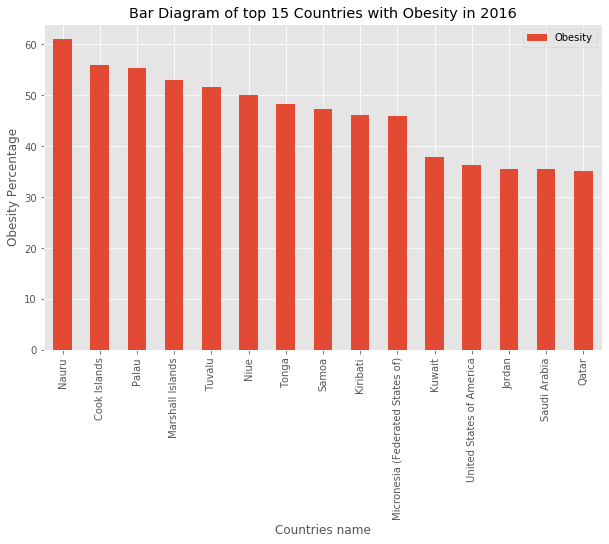

In [30]:
# BAr Diagram view of top 15 countries with Obesity. 
df_top15_Obese_List.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.title('Bar Diagram of top 15 Countries with Obesity in 2016') # add a title to the histogram
plt.xlabel('Countries name') # add y-label
plt.ylabel('Obesity Percentage') # add x-label

plt.show()



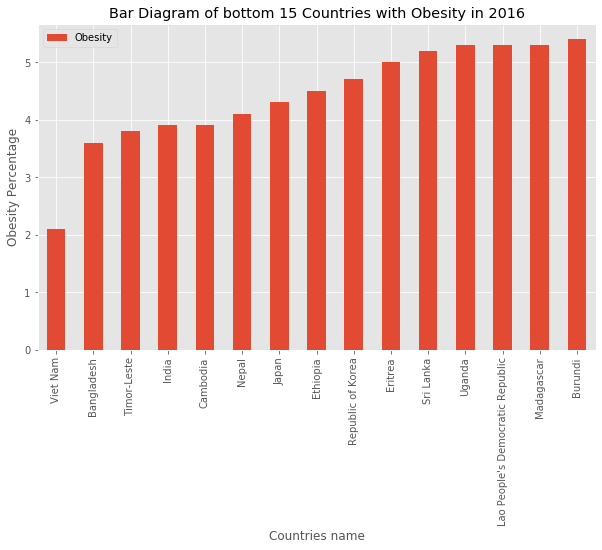

In [31]:
# BAr Diagram view of top 15 countries with Obesity. 
df_Bottom15_Obese_list.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.title('Bar Diagram of bottom 15 Countries with Obesity in 2016') # add a title to the histogram
plt.xlabel('Countries name') # add y-label
plt.ylabel('Obesity Percentage') # add x-label

plt.show()


## Analyze whether Obesity rate is decreasing in any country ..  

##### Quick way is to verify whether mean , median mode is greater than 2016 Obesity rate. 

In [48]:
df_mean1=df_obesty.groupby(['Country'])['Obesity'].mean()
df_mean=df_mean1.to_frame()
print(df_mean.head())
df_median1=df_obesty.groupby(['Country'])['Obesity'].median()
df_median=df_median1.to_frame()
print(df_median.head())
df_mean.head()
df_median.head()


               Obesity
Country               
Afghanistan   2.190476
Albania      12.445238
Algeria      15.714286
Andorra      20.495238
Angola        3.414286
             Obesity
Country             
Afghanistan     1.75
Albania        11.50
Algeria        15.05
Andorra        21.10
Angola          2.80


,Obesity
Country,
Afghanistan,1.75
Albania,11.50
Algeria,15.05
Andorra,21.10
Angola,2.80


In [50]:
df_2016['1975']=df_1975['Obesity']
df_2016['mean']=df_mean['Obesity']
df_2016['median']=df_median['Obesity']

df_Obese_analyze=df_2016.rename(columns={'Obesity':'2016-Obesity','1975':'1975-Obesity'})
df_Obese_analyze.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,2016-Obesity,1975-Obesity,mean,median
Country,,,,
Afghanistan,5.5,0.5,2.190476,1.75
Albania,21.7,6.5,12.445238,11.50
Algeria,27.4,6.9,15.714286,15.05
Andorra,25.6,12.9,20.495238,21.10
Angola,8.2,0.8,3.414286,2.80


In [51]:
# Check whether Mean or Median is greater than 2016 Obesity rate , implies obesity rate is decreasing. 
df_Obese_analyze[(df_Obese_analyze['2016-Obesity'] <= df_Obese_analyze['mean'])]
df_Obese_analyze[(df_Obese_analyze['2016-Obesity'] <= df_Obese_analyze['median'])]

,2016-Obesity,1975-Obesity,mean,median
Country,,,,


### Above analysis implies ,  no country has obesity rate on considerable declining path.

#### Verify which country has increased in Obesity ration compare from current decade to last decade. 

In [52]:
# Since Mean is greater than median , implies second half has inclined Obesity ratio. 
df_Obese_analyze[(df_Obese_analyze['mean'] >= df_Obese_analyze['median'] + 1)]

,2016-Obesity,1975-Obesity,mean,median
Country,,,,
Costa Rica,25.7,5.2,13.526190,12.45
Dominican Republic,27.6,5.8,14.883333,13.65
Haiti,22.7,3.2,10.250000,8.85
Malaysia,15.6,1.4,6.535714,5.30
United Arab Emirates,31.7,13.7,21.028571,19.95
Yemen,17.1,2.8,8.214286,7.15


In [63]:
## Lets analyze the United Arab Emirates Obesity ratio from last 4 decades
df_UAElist = df_obesty[(df_obesty['Country'] == 'United Arab Emirates')]
df_UAElist.head()


,Country,Year,Obesity
23058,United Arab Emirates,1975,13.7
23061,United Arab Emirates,1976,13.9
23064,United Arab Emirates,1977,14.0
23067,United Arab Emirates,1978,14.3
23070,United Arab Emirates,1979,14.5


In [77]:
# Pick the column that are necessary and set index to Year. 

df_UAE=df_UAElist[['Year','Obesity']].set_index('Year')

df_UAE.head()

,Obesity
Year,
1975,13.7
1976,13.9
1977,14.0
1978,14.3
1979,14.5


### Line Diagram view of UAE Obesity rate from 1975 to 2016. 

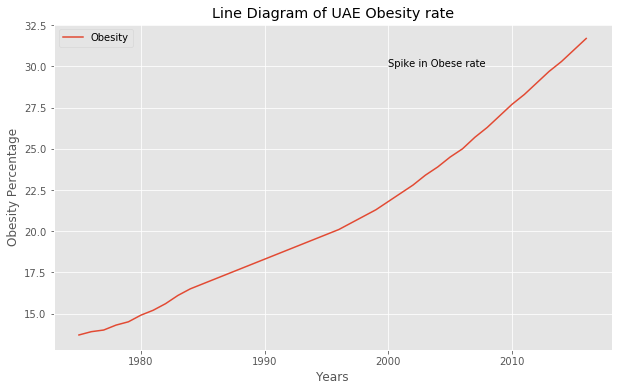

In [75]:
# Line Diagram view of UAE Obecity ratetop 15 countries with Obesity. 
df_UAE.plot(kind='line', figsize=(10, 6))

plt.title('Line Diagram of UAE Obesity rate') # add a title to the histogram
plt.xlabel('Years') # add y-label
plt.ylabel('Obesity Percentage') # add x-label
plt.text(2000, 30.0, 'Spike in Obese rate')
plt.show()

## Based on analysis from diagram, in first 25 years for UAE, Obesity rate increased by only 9 % and last 15 years it increased by 11% , based on food habits and changes